# K-Means clustering and Centroid Norm Averaging

## Generate samples from 2D Gaussian

### Imports

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
n_samples = 10000
data = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], n_samples)

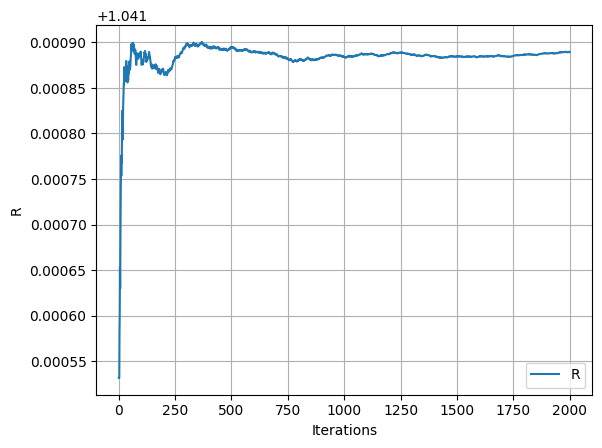

In [ ]:
k = 3
iterations = 20000
R_vals = []
def kmeans(data):
	kmeans = KMeans(n_clusters=k, n_init=10).fit(data)
	centroids = kmeans.cluster_centers_
	norms = np.linalg.norm(centroids, axis=1)
	return np.mean(norms)

for i in range(iterations):
	R_vals.append(kmeans(data))
cumulative = np.cumsum(R_vals) / np.arange(1, iterations+1)
plt.plot(range(1, iterations+1), cumulative, label='R')
plt.xlabel('Iterations')
plt.ylabel('R')
plt.legend()
plt.grid()
plt.show()

## Empirical test

In [5]:
iterations = 1000000
tolerance = 1e-9
R_vals = []
norms = []
for i in range(iterations):
	norms.append(kmeans(data))
	cum_avg = np.mean(norms)
	R_vals.append(cum_avg)
	# print(i)
	if i > 0 and np.abs(R_vals[-1] - R_vals[-2]) < tolerance:
		print(f'Converged after {i} iterations')
		break

Converged after 885 iterations
